In [1]:
!pip install git+https://github.com/debarko/starter-code

  Cloning https://github.com/debarko/starter-code to c:\users\debark~1\appdata\local\temp\pip-req-build-1sms0f6q
  Created wheel for Colab-Utils: filename=Colab_Utils-0.1.dev0-py3-none-any.whl size=10409 sha256=5ac38e0a750a7bd229a279b85882894a59726aeee16600d87ccb9639b31f43a5
  Stored in directory: C:\Users\DEBARK~1\AppData\Local\Temp\pip-ephem-wheel-cache-e2t9j96y\wheels\56\5b\03\7e0d529ccda2613ba065cd18b92764cf5b1d984fe1177af233
Successfully built Colab-Utils


In [2]:
import coutils
import torch
import torchvision
import matplotlib.pyplot as plt
import statistics

plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['font.size'] = 16

In [3]:
x_train, y_train, x_test, y_test = coutils.data.cifar10()

print('Training set:', )
print('  data shape:', x_train.shape)
print('  labels shape: ', y_train.shape)
print('Test set:')
print('  data shape: ', x_test.shape)
print('  labels shape', y_test.shape)

Training set:
  data shape: torch.Size([50000, 3, 32, 32])
  labels shape:  torch.Size([50000])
Test set:
  data shape:  torch.Size([10000, 3, 32, 32])
  labels shape torch.Size([10000])


C:\src\anaconda3\envs\PyTorch\lib\site-packages\ipykernel_launcher.py:9: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  ..\torch\csrc\utils\python_arg_parser.cpp:766.)
  if __name__ == '__main__':


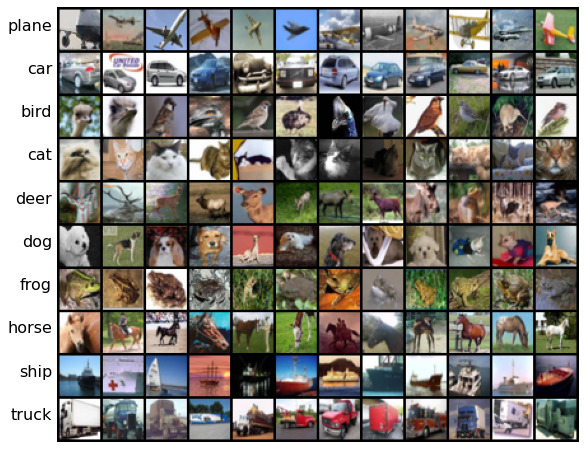

In [4]:
import random
from torchvision.utils import make_grid

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
samples_per_class = 12
samples = []
for y, cls in enumerate(classes):
  plt.text(-4, 34 * y + 18, cls, ha='right')
  idxs = (y_train == y).nonzero().view(-1)
  for i in range(samples_per_class):
    idx = idxs[random.randrange(idxs.shape[0])].item()
    samples.append(x_train[idx])
img = torchvision.utils.make_grid(samples, nrow=samples_per_class)
plt.imshow(coutils.tensor_to_image(img))
plt.axis('off')
plt.show()

In [5]:
num_train = 500
num_test = 250

x_train, y_train, x_test, y_test = coutils.data.cifar10(num_train, num_test)

print('Training set:', )
print('  data shape:', x_train.shape)
print('  labels shape: ', y_train.shape)
print('Test set:')
print('  data shape: ', x_test.shape)
print('  labels shape', y_test.shape)

Training set:
  data shape: torch.Size([500, 3, 32, 32])
  labels shape:  torch.Size([500])
Test set:
  data shape:  torch.Size([250, 3, 32, 32])
  labels shape torch.Size([250])


In [6]:
def compute_distances_two_loops(x_train, x_test):
  """
  Computes the squared Euclidean distance between each element of the training
  set and each element of the test set. Images should be flattened and treated
  as vectors.

  This implementation uses a naive set of nested loops over the training and
  test data.
  
  Inputs:
  - x_train: Torch tensor of shape (num_train, C, H, W)
  - x_test: Torch tensor of shape (num_test, C, H, W)

  Returns:
  - dists: Torch tensor of shape (num_train, num_test) where dists[i, j] is the
    squared Euclidean distance between the ith training point and the jth test
    point.
  """
  # Initialize dists to be a tensor of shape (num_train, num_test) with the
  # same datatype and device as x_train
  num_train = x_train.shape[0]
  num_test = x_test.shape[0]
  dists = x_train.new_zeros(num_train, num_test)
  ##############################################################################
  # TODO: Implement this function using a pair of nested loops over the        #
  # training data and the test data.                                           #
  #                                                                            #
  # You may not use torch.norm (or its instance method variant), nor any       #
  # functions from torch.nn or torch.nn.functional.                            #
  ##############################################################################
  # Replace "pass" statement with your code
  xtrc = x_train.clone()
  xtec = x_test.clone()
  xtrc = xtrc.view(num_train, xtrc.shape[1] * xtrc.shape[2] * xtrc.shape[3])
  xtec = xtec.view(num_test, xtec.shape[1] * xtec.shape[2] * xtec.shape[3])
  for i in range(xtrc.shape[0]):
    for j in range(xtec.shape[0]):
        dists[i][j] = torch.sqrt(torch.sum(torch.square(torch.abs(xtrc[i]+(xtec[j]*-1)))))
  
  ##############################################################################
  #                             END OF YOUR CODE                               #
  ##############################################################################
  return dists
compute_distances_two_loops(x_train, x_test)

tensor([[14.9173, 24.8503, 20.4896,  ..., 19.1445, 12.9922, 18.6386],
        [16.5121, 20.6678, 16.6692,  ..., 15.8133, 14.9039, 23.6164],
        [21.5845, 15.8456, 14.7998,  ..., 14.0411, 20.6338, 30.4656],
        ...,
        [19.5397, 15.5404, 15.8497,  ..., 14.6606, 17.2823, 31.1886],
        [19.0878, 18.3218, 18.3741,  ..., 15.3109, 17.2905, 28.9482],
        [15.4578, 20.4593, 16.7217,  ..., 16.1589, 15.2839, 22.1116]])

In [7]:
num_train = 500
num_test = 250
x_train, y_train, x_test, y_test = coutils.data.cifar10(num_train, num_test)

dists = compute_distances_two_loops(x_train, x_test)
print('dists has shape: ', dists.shape)

dists has shape:  torch.Size([500, 250])


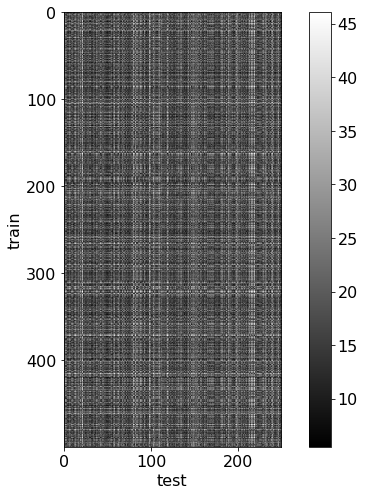

In [8]:
plt.imshow(dists.numpy(), cmap='gray', interpolation='none')
plt.colorbar()
plt.xlabel('test')
plt.ylabel('train')
plt.show()

In [129]:
def compute_distances_one_loop(x_train, x_test):
  """
  Computes the squared Euclidean distance between each element of the training
  set and each element of the test set. Images should be flattened and treated
  as vectors.

  This implementation uses only a single loop over the training data.

  Inputs:
  - x_train: Torch tensor of shape (num_train, C, H, W)
  - x_test: Torch tensor of shape (num_test, C, H, W)

  Returns:
  - dists: Torch tensor of shape (num_train, num_test) where dists[i, j] is the
    squared Euclidean distance between the ith training point and the jth test
    point.
  """
  # Initialize dists to be a tensor of shape (num_train, num_test) with the
  # same datatype and device as x_train
  num_train = x_train.shape[0]
  num_test = x_test.shape[0]
  dists = x_train.new_zeros(num_train, num_test)
  ##############################################################################
  # TODO: Implement this function using only a single loop over x_train.       #
  #                                                                            #
  # You may not use torch.norm (or its instance method variant), nor any       #
  # functions from torch.nn or torch.nn.functional.                            #
  ##############################################################################
  # Replace "pass" statement with your code
  xtrc = x_train.clone()
  xtec = x_test.clone()
  xtrc = xtrc.view(num_train, xtrc.shape[1] * xtrc.shape[2] * xtrc.shape[3])
  xtec = xtec.view(num_test, xtec.shape[1] * xtec.shape[2] * xtec.shape[3])
  for i in range(xtrc.shape[0]):
    out_temp = torch.sqrt(torch.sum(torch.square(torch.abs(xtrc[i] + xtec * -1)), 1))
    dists[i] = out_temp
  ##############################################################################
  #                             END OF YOUR CODE                               #
  ##############################################################################
  return dists

In [130]:
torch.manual_seed(0)
x_train_rand = torch.randn(100, 3, 16, 16, dtype=torch.float64)
x_test_rand = torch.randn(100, 3, 16, 16, dtype=torch.float64)

dists_one = compute_distances_one_loop(x_train_rand, x_test_rand)
dists_two = compute_distances_two_loops(x_train_rand, x_test_rand)
difference = (dists_one - dists_two).pow(2).sum().sqrt().item()
print('Difference: ', difference)
if difference < 1e-4:
  print('Good! The distance matrices match')
else:
  print('Uh-oh! The distance matrices are different')

Difference:  0.0
Good! The distance matrices match


In [308]:
def compute_distances_no_loops(x_train, x_test):
  """
  Computes the squared Euclidean distance between each element of the training
  set and each element of the test set. Images should be flattened and treated
  as vectors.

  This implementation should not use any Python loops. For memory-efficiency,
  it also should not create any large intermediate tensors; in particular you
  should not create any intermediate tensors with O(num_train*num_test)
  elements.

  Inputs:
  - x_train: Torch tensor of shape (num_train, C, H, W)
  - x_test: Torch tensor of shape (num_test, C, H, W)

  Returns:
  - dists: Torch tensor of shape (num_train, num_test) where dists[i, j] is the
    squared Euclidean distance between the ith training point and the jth test
    point.
  """
  # Initialize dists to be a tensor of shape (num_train, num_test) with the
  # same datatype and device as x_train
  num_train = x_train.shape[0]
  num_test = x_test.shape[0]
  dists = x_train.new_zeros(num_train, num_test)
  ##############################################################################
  # TODO: Implement this function without using any explicit loops and without #
  # creating any intermediate tensors with O(num_train * num_test) elements.   #
  #                                                                            #
  # You may not use torch.norm (or its instance method variant), nor any       #
  # functions from torch.nn or torch.nn.functional.                            #
  #                                                                            #
  # HINT: Try to formulate the Euclidean distance using two broadcast sums     #
  #       and a matrix multiply.                                               #
  ##############################################################################
  # Replace "pass" statement with your code
  image_dimension = x_train.shape[1] * x_train.shape[2] * x_train.shape[3]
  xtrc = x_train.view(num_train, image_dimension)
  xtec = x_test.view(num_test, image_dimension)
  # The below two lines shape up the tensor for doing the operation
  # train data is shaped like [[1,2,3], [1,2,3], [1,2,3], [2,3,4], [2,3,4], [2,3,4]]
  # test data is shaped like [[1,2,3], [2,3,4],[1,2,3], [2,3,4],[1,2,3], [2,3,4]]
  xtrc_e = xtrc.unsqueeze(1).expand(-1, num_test, -1).reshape(num_train*num_test,xtrc.shape[1])
  xtec_e = xtec.unsqueeze(0).expand(num_test, -1, -1).reshape(num_train*num_test,xtrc.shape[1])
  out = torch.square(torch.abs(xtrc_e + xtec_e * -1))
  out = out.view(num_test, num_train, image_dimension) #this reshape brings it back to the actual shape
  dists = torch.sqrt(torch.sum(out, 2))
  #TODO: Fix the implementation since this takes enormous time due to the reshaping
  ##############################################################################
  #                             END OF YOUR CODE                               #
  ##############################################################################
  return dists

In [309]:
torch.manual_seed(0)
x_train_rand = torch.randn(100, 3, 16, 16, dtype=torch.float64)
x_test_rand = torch.randn(100, 3, 16, 16, dtype=torch.float64)

dists_two = compute_distances_two_loops(x_train_rand, x_test_rand)
dists_none = compute_distances_no_loops(x_train_rand, x_test_rand)
difference = (dists_two - dists_none).pow(2).sum().sqrt().item()
print('Difference: ', difference)
if difference < 1e-4:
  print('Good! The distance matrices match')
else:
  print('Uh-oh! The distance matrices are different')

Difference:  0.0
Good! The distance matrices match


In [300]:
# This might help you understand what going on in the reshaping above
# It's still a bit cryptic.
x = torch.tensor([[1,2,3,4], [2,3,4,5], [3,4,5,6]])
print('x.shape', x.shape)
print('x', x)
print('unsqeezed shape', x.unsqueeze(0).expand(10, -1, -1).shape)
print('final output', x.unsqueeze(1).expand(-1, 10, -1).reshape(30,4).shape)

x.shape torch.Size([3, 4])
x tensor([[1, 2, 3, 4],
        [2, 3, 4, 5],
        [3, 4, 5, 6]])
unsqeezed shape torch.Size([10, 3, 4])
final output torch.Size([30, 4])


In [310]:
import time

def timeit(f, *args):
  tic = time.time()
  f(*args) 
  toc = time.time()
  return toc - tic

torch.manual_seed(0)
x_train_rand = torch.randn(500, 3, 32, 32)
x_test_rand = torch.randn(500, 3, 32, 32)

two_loop_time = timeit(compute_distances_two_loops, x_train_rand, x_test_rand)
print('Two loop version took %.2f seconds' % two_loop_time)

one_loop_time = timeit(compute_distances_one_loop, x_train_rand, x_test_rand)
speedup = two_loop_time / one_loop_time
print('One loop version took %.2f seconds (%.1fX speedup)'
      % (one_loop_time, speedup))

no_loop_time = timeit(compute_distances_no_loops, x_train_rand, x_test_rand)
speedup = two_loop_time / no_loop_time
print('No loop version took %.2f seconds (%.1fX speedup)'
      % (no_loop_time, speedup))

Two loop version took 16.01 seconds
One loop version took 2.83 seconds (5.7X speedup)
No loop version took 6.79 seconds (2.4X speedup)
